In [8]:
import xarray as xr
import numpy as np
import os

import functions.eddy_feedback as ef
import functions.data_wrangling as dw

import warnings
warnings.filterwarnings('ignore', category=xr.SerializationWarning)

In [9]:
data_path = '/gws/nopw/j04/arctic_connect/cturrell/CMIP6/piControl/efp_data_sit/30y/mon_avg_daily'
file_list = [file for file in os.listdir(data_path) if file.endswith('.nc')]

datasets = {}
for file in file_list:
    
    print(file)
    
    file_path = os.path.join(data_path, file)
    model_name = file.split('_')[0]
    
    ds = xr.open_dataset(file_path)
    datasets[model_name] = ds

ACCESS-CM2_30y_mm_uvt_ubar_epf.nc
ACCESS-ESM1-5_30y_mm_uvt_ubar_epf.nc
AWI-ESM-1-1-LR_30y_mm_uvt_ubar_epf.nc
CMCC-CM2-SR5_30y_mm_uvt_ubar_epf.nc
CMCC-ESM2_30y_mm_uvt_ubar_epf.nc
EC-Earth3-CC_30y_mm_uvt_ubar_epf.nc
EC-Earth3-LR_30y_mm_uvt_ubar_epf.nc
EC-Earth3-Veg-LR_30y_mm_uvt_ubar_epf.nc
EC-Earth3-Veg_30y_mm_uvt_ubar_epf.nc
GFDL-CM4_30y_mm_uvt_ubar_epf.nc
IPSL-CM5A2-INCA_30y_mm_uvt_ubar_epf.nc
IPSL-CM6A-LR_30y_mm_uvt_ubar_epf.nc
KIOST-ESM_30y_mm_uvt_ubar_epf.nc
MIROC6_30y_mm_uvt_ubar_epf.nc
MPI-ESM-1-2-HAM_30y_mm_uvt_ubar_epf.nc
MPI-ESM1-2-HR_30y_mm_uvt_ubar_epf.nc
MPI-ESM1-2-LR_30y_mm_uvt_ubar_epf.nc
MRI-ESM2-0_30y_mm_uvt_ubar_epf.nc


In [10]:
datasets['ACCESS-CM2']

<xarray.Dataset> Size: 377MB
Dimensions:      (time: 361, level: 3, lat: 145, lon: 192)
Coordinates:
  * level        (level) float64 24B 850.0 500.0 250.0
  * lat          (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon          (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * time         (time) object 3kB 1085-01-31 00:00:00 ... 1115-01-31 00:00:00
Data variables: (12/16)
    ucomp        (time, level, lat, lon) float32 121MB ...
    vcomp        (time, level, lat, lon) float32 121MB ...
    temp         (time, level, lat, lon) float32 121MB ...
    ep1_QG       (time, level, lat) float32 628kB ...
    ep2_QG       (time, level, lat) float64 1MB ...
    div1_QG      (time, level, lat) float64 1MB ...
    ...           ...
    div2_QG_123  (time, level, lat) float64 1MB ...
    ep1_QG_gt3   (time, level, lat) float64 1MB ...
    ep2_QG_gt3   (time, level, lat) float64 1MB ...
    div1_QG_gt3  (time, level, lat) float64 1MB ...
    div2_QG_gt3  (time, level, lat) float64 1MB ...
    ubar         (time, level, lat) float32 628kB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  346615.0
    creation_date:          2019-11-11T23:36:56Z
    ...                     ...
    variable_id:            ua
    variant_label:          r1i1p1f1
    version:                v20191112
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/fc599c37-2d43-4fd7-b9ee-76dd7392ec32
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [11]:
for model, ds in datasets.items():
    efp = ef.calculate_efp(ds, data_type='isca', which_div1='div1_QG')
    
    print(f'{model} : {efp}')

ACCESS-CM2 : 0.2818
ACCESS-ESM1-5 : 0.1766
AWI-ESM-1-1-LR : 0.1539
CMCC-CM2-SR5 : 0.3332
CMCC-ESM2 : 0.2334
EC-Earth3-CC : 0.2345
EC-Earth3-LR : 0.2384
EC-Earth3-Veg-LR : 0.3046
EC-Earth3-Veg : 0.1865
GFDL-CM4 : 0.2843
IPSL-CM5A2-INCA : 0.2945
IPSL-CM6A-LR : 0.1927
KIOST-ESM : 0.227
MIROC6 : 0.1326
MPI-ESM-1-2-HAM : 0.2372
MPI-ESM1-2-HR : 0.1691
MPI-ESM1-2-LR : 0.2565
MRI-ESM2-0 : 0.2584


In [12]:
# for model, ds in datasets.items():
#     time_var = ds['time']
#     time_type = type(time_var.values[0])
    
#     # Check if calendar attribute exists
#     calendar = time_var.attrs.get('calendar', 'standard')
    
#     print(f'{model}:')
#     print(f'  Type: {time_type}')
#     print(f'  Calendar: {calendar}')
#     print(f'  Dtype: {time_var.dtype}')
#     print()

In [13]:
# for model, ds in datasets.items():
#     time_var = ds['time']
#     time_type = type(time_var.values[0])
    
#     print(f'{model}:')
#     print(f'  Type: {time_type}')
#     print(f'  Start date: {time_var.values[0]}')
#     print(f'  End date: {time_var.values[-1]}')
#     print()

In [14]:
# for model, ds in datasets.items():
#     time_var = ds['time']
#     time_type = type(time_var.values[0])
    
#     print(f'{model}:')
#     print(f'  Type: {time_type}')
#     print(f'  ubar: {ds.ubar.sizes}')
#     print(f'  div1: {ds.div1_QG.sizes}')
#     print()

# Load up a singular model

In [15]:
# Models with 1.0
models_1_0 = [
    'ACCESS-CM2',
    'ACCESS-ESM1-5',
    'AWI-ESM-1-1-LR',
    'CMCC-CM2-SR5',
    'CMCC-ESM2',
    'EC-Earth3-CC',
    'EC-Earth3-LR',
    'EC-Earth3-Veg-LR',
    'EC-Earth3-Veg',
    'MIROC6',
    'MRI-ESM2-0'
]


# Models with EFP value
models_other_list = [
    'GFDL-CM4',
    'IPSL-CM5A2-INCA',
    'IPSL-CM6A-LR',
    'KIOST-ESM',
    'MPI-ESM-1-2-HAM',
    'MPI-ESM1-2-HR',
    'MPI-ESM1-2-LR',
    'NorESM2-LM'
]

In [16]:
mon_avg_path = '/gws/nopw/j04/arctic_connect/cturrell/CMIP6/piControl/efp_data_sit/30y/mon_avg_daily'
path = '/gws/nopw/j04/arctic_connect/cturrell/CMIP6/piControl/efp_data_sit/30y/daily_averages'

In [17]:
def process_seasonal_data(ds, variables=['ubar', 'div1_QG'], 
                          time_slice=(2, 358),
                          level=500.,
                          lat_range=(25, 75),
                          season_month=12,
                          plot=True,
                          model_name=None):

    import matplotlib.pyplot as plt
    
    # Subset data
    ds_out = ds[variables]
    ds_out = ds_out.isel(time=slice(time_slice[0], time_slice[1]))
    # ds_out = ds_out.resample(time='QS-DEC').mean('time')
    ds_out = ds_out.sel(level=level, method='nearest').sel(lat=slice(lat_range[0], lat_range[1]))
    # ds_out = ds_out.sel(time=ds_out.time.dt.month == season_month)
    
    # Add suptitle with model and year range
    year_start = int(ds_out.time.dt.year.min().values)
    year_end = int(ds_out.time.dt.year.max().values)
    
    ds_out = ds_out.mean(dim='lat')
    
    
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        if 'ubar' in ds_out:
            ds_out.ubar.plot(ax=axes[0])
            axes[0].set_title('ubar')
        
        if 'div1_QG' in ds_out:
            ds_out.div1_QG.plot(ax=axes[1])
            axes[1].set_title('div1_QG')
        

        
        if model_name:
            fig.suptitle(f'{model_name}: {year_start}-{year_end}', fontsize=14, y=1.02)
        else:
            fig.suptitle(f'{year_start}-{year_end}', fontsize=14, y=1.02)
        
        plt.tight_layout()
    
    return ds_out


## Working Models

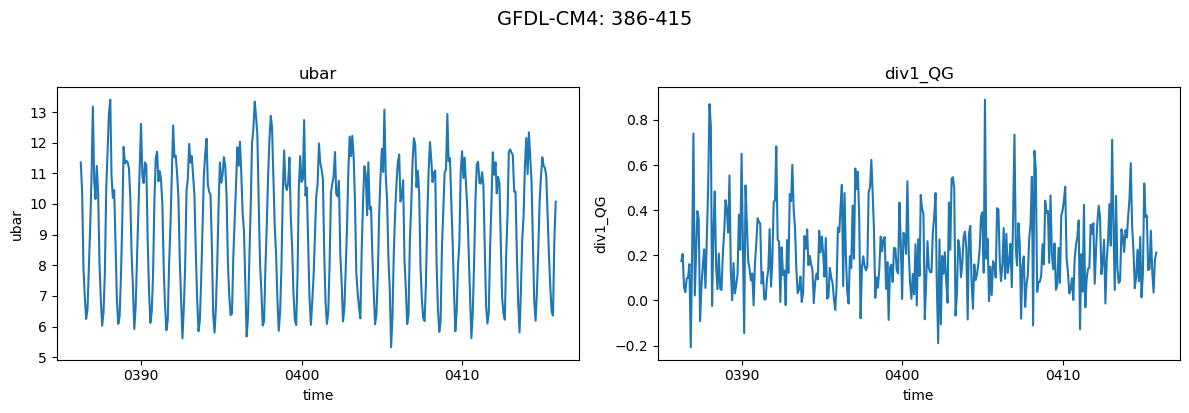

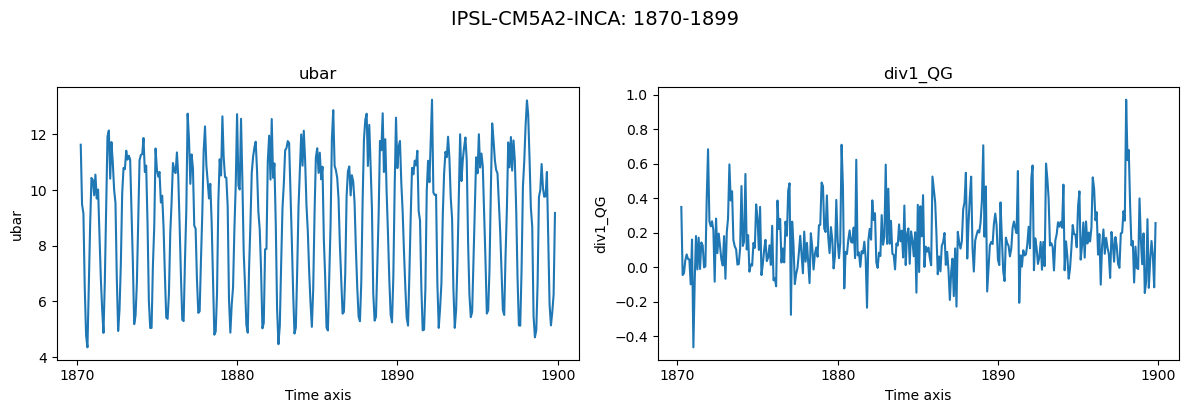

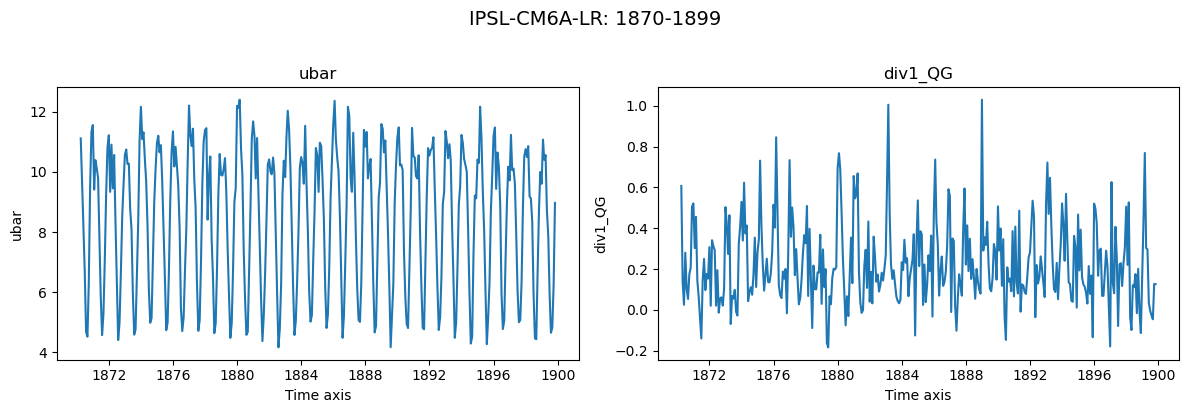

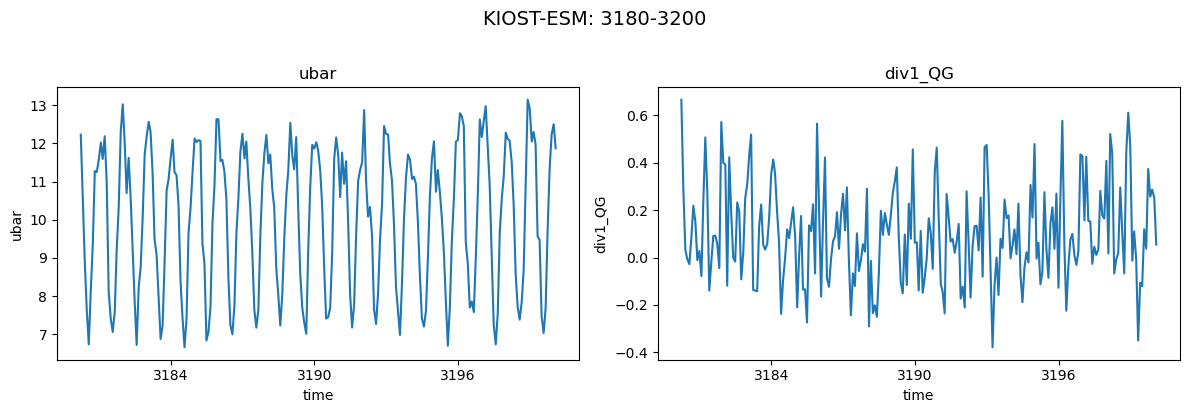

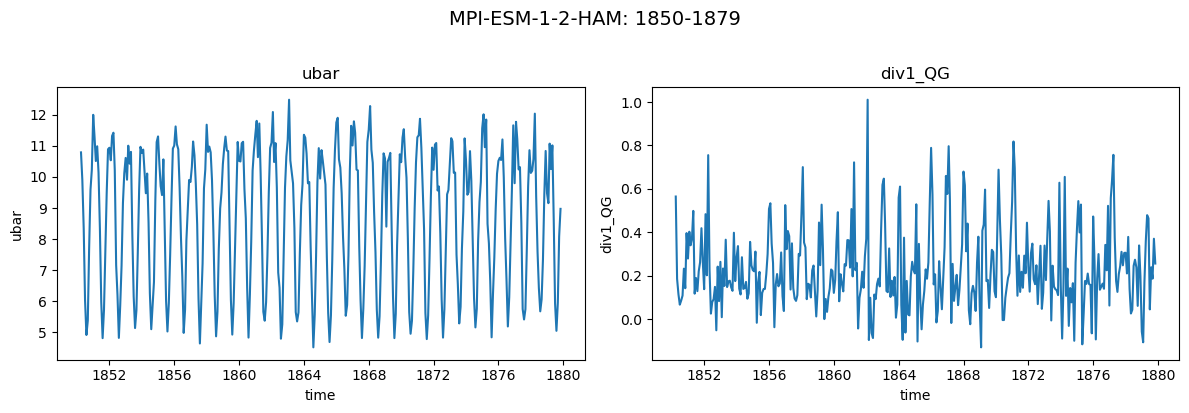

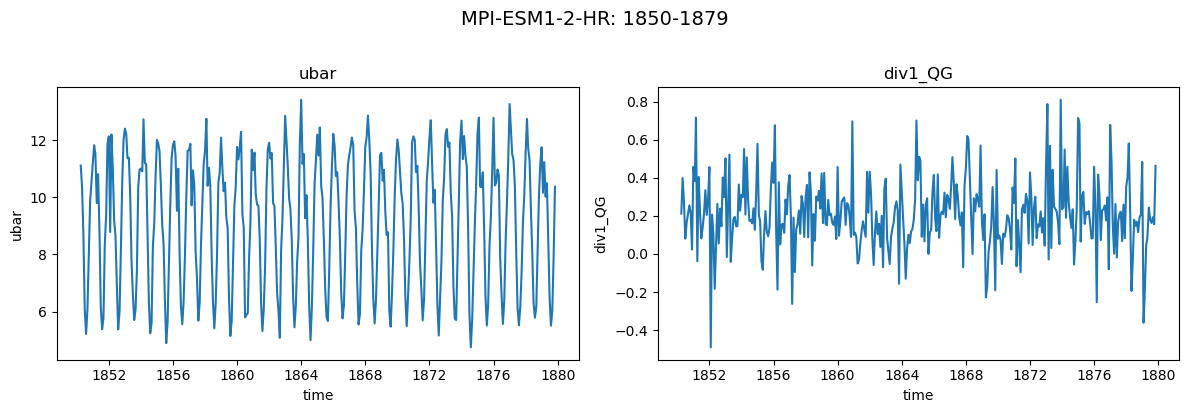

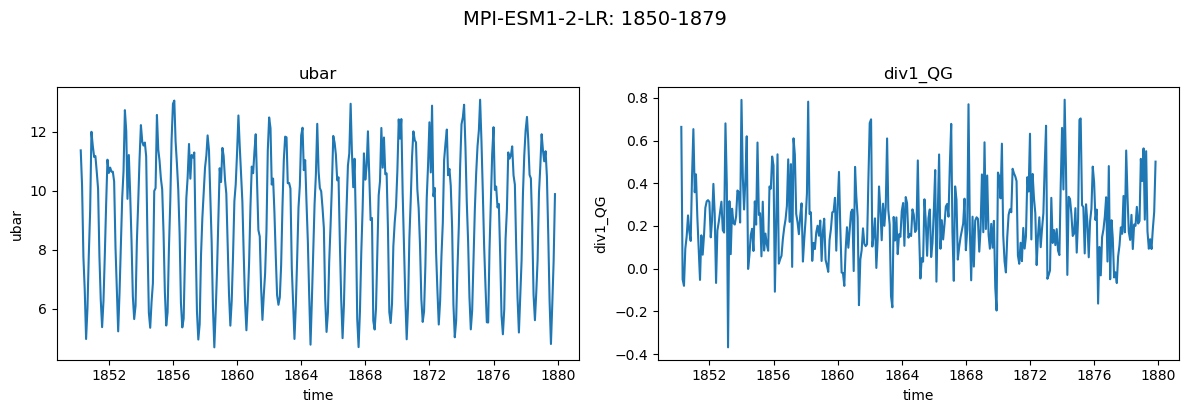

In [19]:
for model in models_other_list:
    
    if model == 'NorESM2-LM':
        continue
    
    process_seasonal_data(datasets[model], model_name=model)

## 1.0 Models

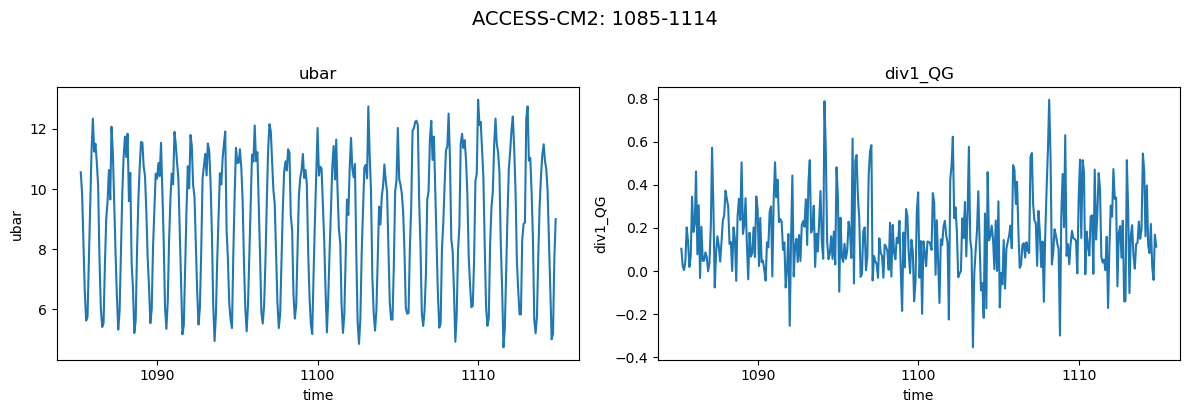

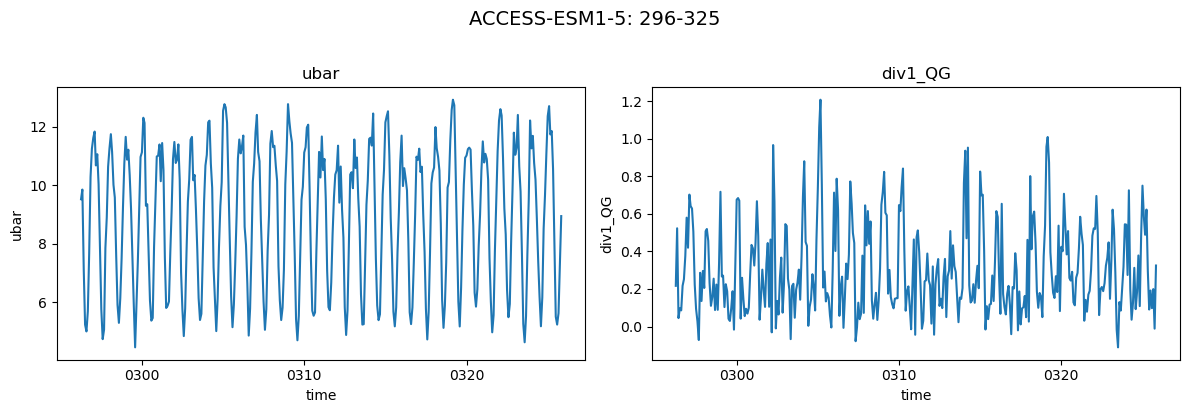

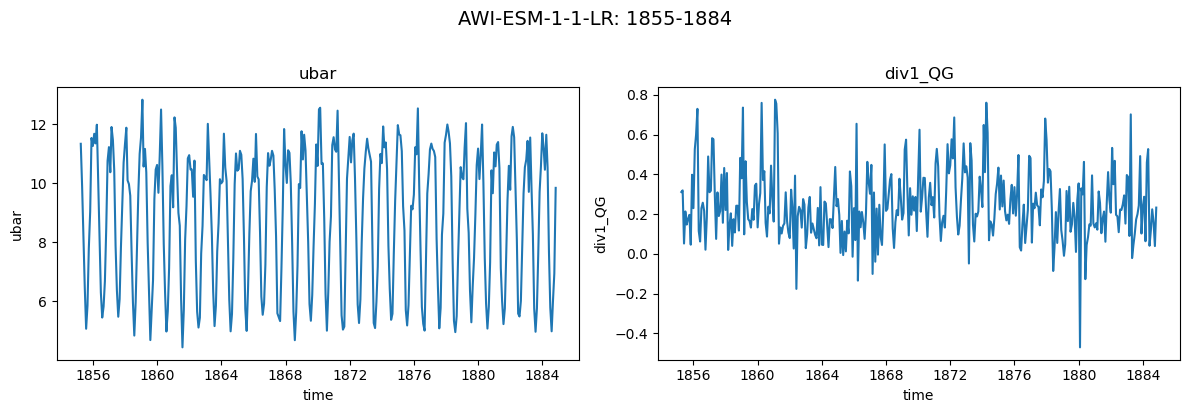

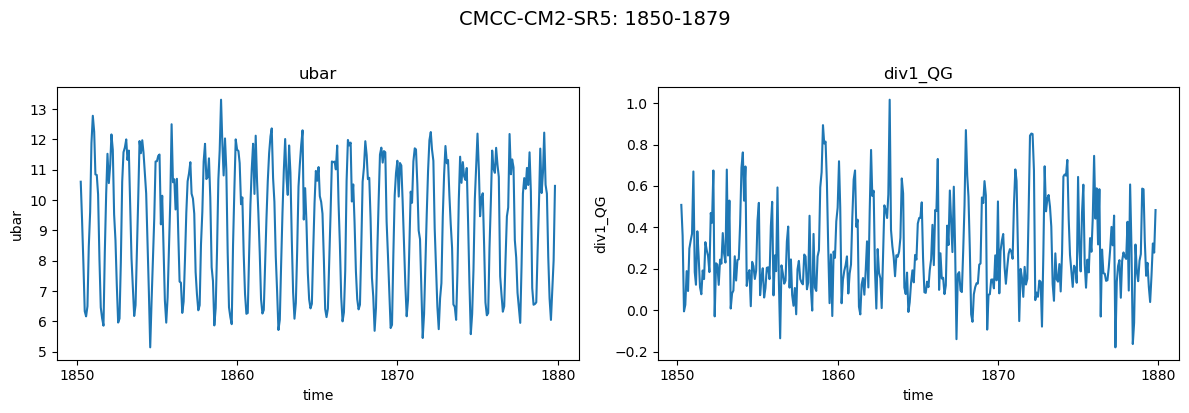

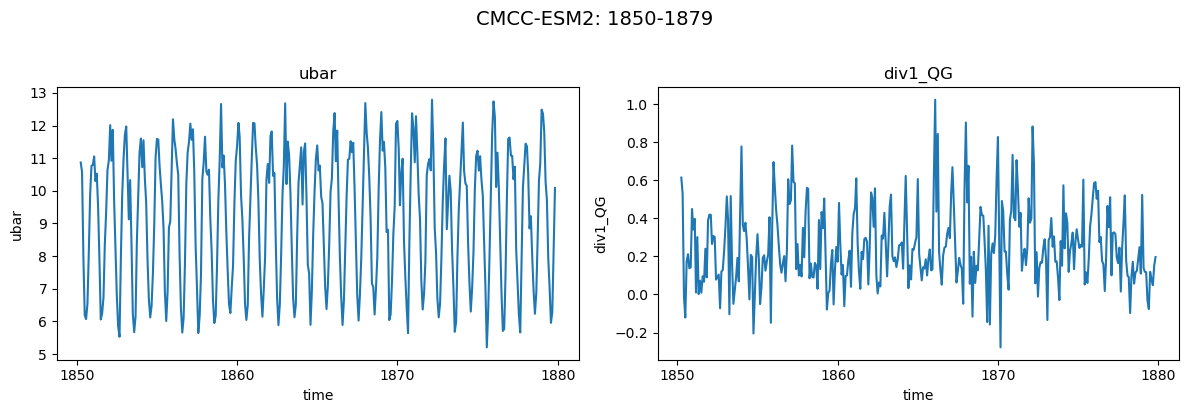

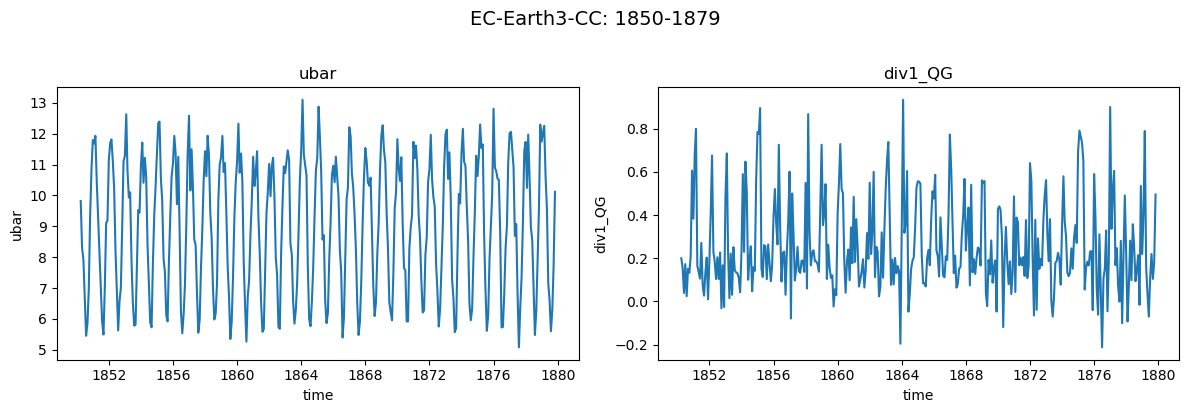

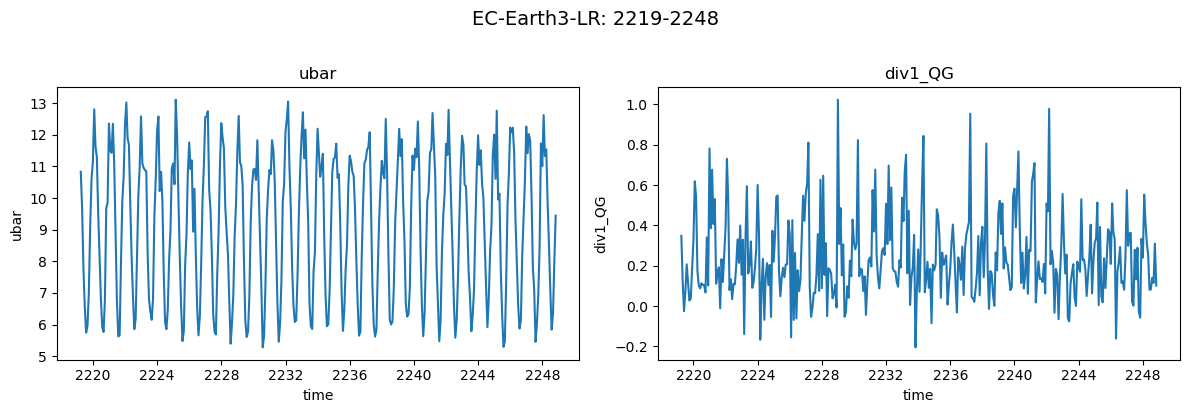

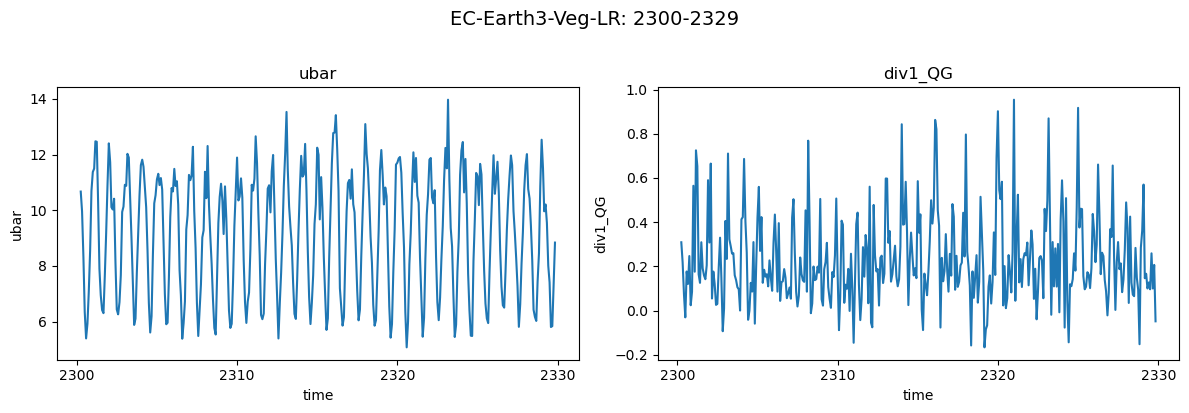

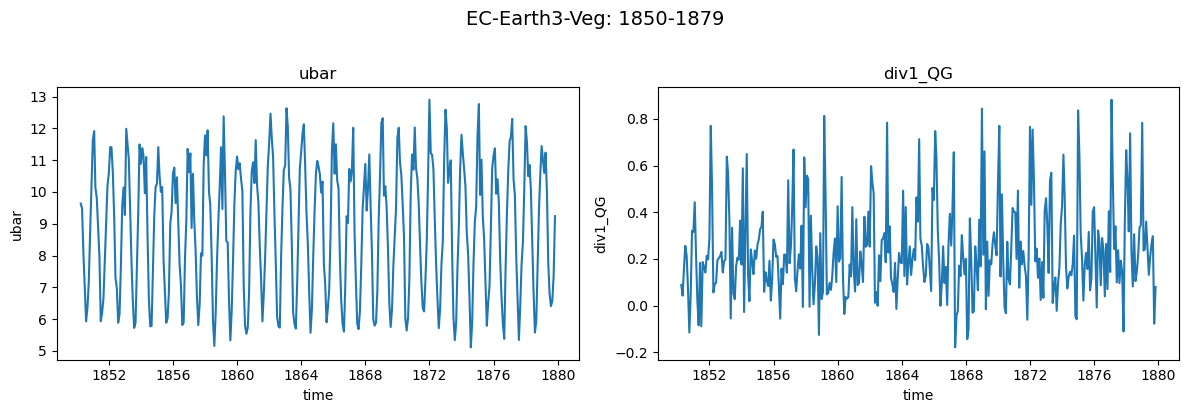

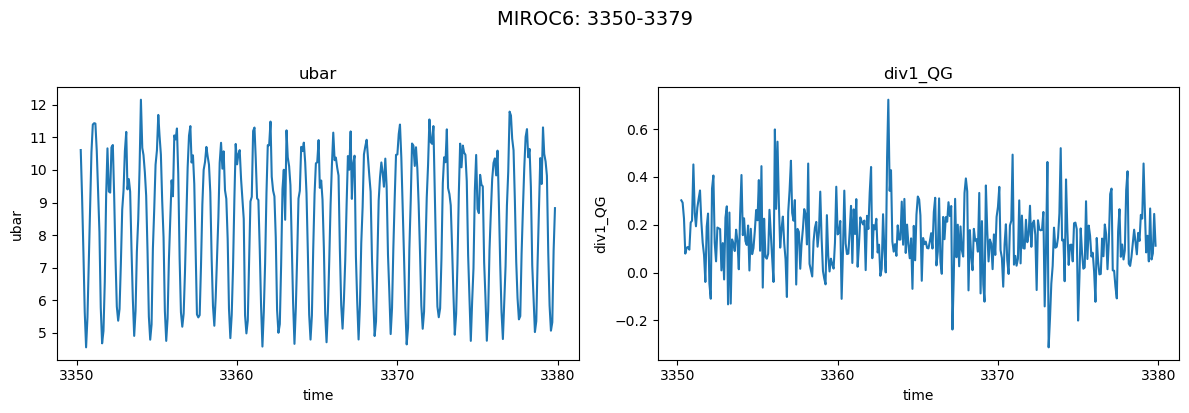

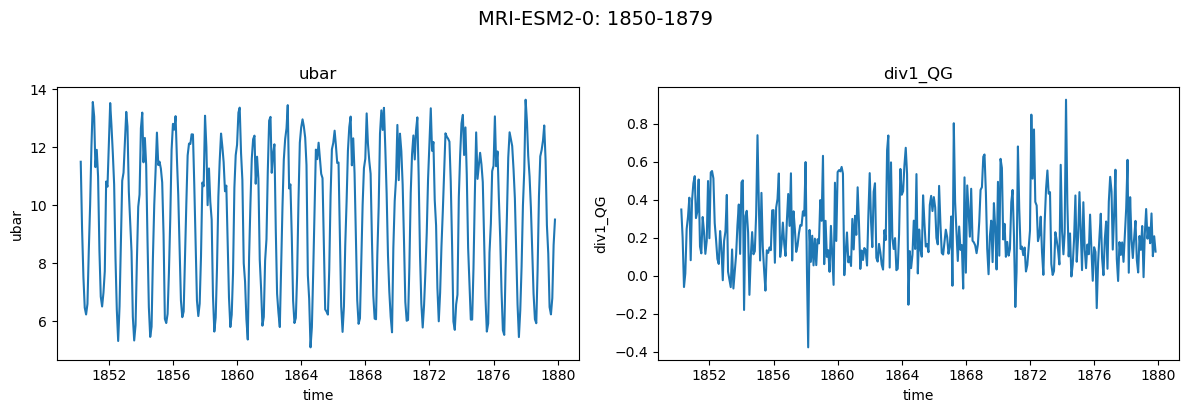

In [20]:
for model in models_1_0:
    process_seasonal_data(datasets[model], model_name=model)

# Daily files (SIT data)

## ACCESS-CM2

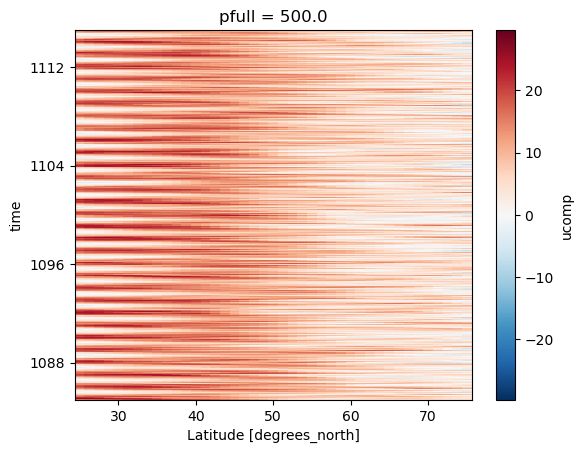

In [21]:
import glob

sit_path = '/gws/nopw/j04/arctic_connect/sthomson/efp_6hourly_processed_data/1000hPa_100hPa_slice_inner2/ACCESS-CM2/1085_1115/6hrPlevPt/yearly_data'
files = glob.glob(os.path.join(sit_path, '*_daily_averages.nc'))

access_ds = xr.open_mfdataset(files, combine='by_coords', chunks={'time': 12})

ubar = access_ds['ucomp'].sel(pfull=500., method='nearest').sel(lat=slice(25, 75)).mean('lon')
ubar.plot()

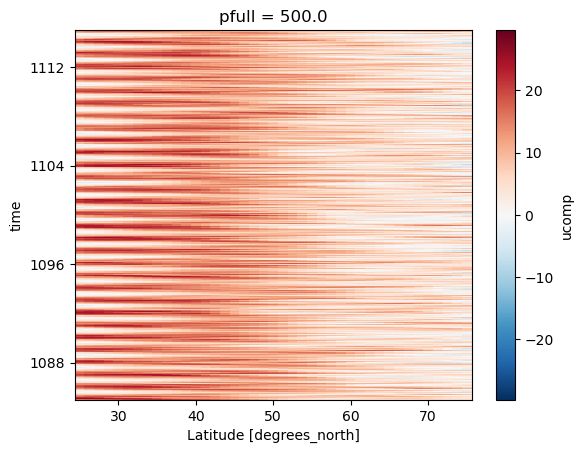

In [22]:
import glob

daily_path = '/gws/nopw/j04/arctic_connect/cturrell/CMIP6/piControl/efp_data_sit/30y/daily_averages/ACCESS-CM2'
daily_files = glob.glob(os.path.join(daily_path, '*_dm_uvt_epfluxes.nc'))

access_daily_ds = xr.open_mfdataset(daily_files, combine='by_coords', chunks={'time': 12})

ubar_daily = access_daily_ds['ucomp'].sel(pfull=500., method='nearest').sel(lat=slice(25, 75)).mean('lon')
ubar_daily.plot()

In [23]:
import glob

mon_path = '/gws/nopw/j04/arctic_connect/cturrell/CMIP6/piControl/efp_data_sit/30y/mon_avg_daily'
mon_files = os.path.join(mon_path, 'ACCESS-CM2_30y_mm_uvt_ubar_epf.nc')

access_mon_ds = xr.open_dataset(mon_files, chunks={'time': 12})
access_mon_ds


<xarray.Dataset> Size: 377MB
Dimensions:      (time: 361, level: 3, lat: 145, lon: 192)
Coordinates:
  * level        (level) float64 24B 850.0 500.0 250.0
  * lat          (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon          (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * time         (time) object 3kB 1085-01-31 00:00:00 ... 1115-01-31 00:00:00
Data variables: (12/16)
    ucomp        (time, level, lat, lon) float32 121MB dask.array<chunksize=(12, 3, 145, 192), meta=np.ndarray>
    vcomp        (time, level, lat, lon) float32 121MB dask.array<chunksize=(12, 3, 145, 192), meta=np.ndarray>
    temp         (time, level, lat, lon) float32 121MB dask.array<chunksize=(12, 3, 145, 192), meta=np.ndarray>
    ep1_QG       (time, level, lat) float32 628kB dask.array<chunksize=(12, 3, 145), meta=np.ndarray>
    ep2_QG       (time, level, lat) float64 1MB dask.array<chunksize=(12, 3, 145), meta=np.ndarray>
    div1_QG      (time, level, lat) float64 1MB dask.array<chunksize=(12, 3, 145), meta=np.ndarray>
    ...           ...
    div2_QG_123  (time, level, lat) float64 1MB dask.array<chunksize=(12, 3, 145), meta=np.ndarray>
    ep1_QG_gt3   (time, level, lat) float64 1MB dask.array<chunksize=(12, 3, 145), meta=np.ndarray>
    ep2_QG_gt3   (time, level, lat) float64 1MB dask.array<chunksize=(12, 3, 145), meta=np.ndarray>
    div1_QG_gt3  (time, level, lat) float64 1MB dask.array<chunksize=(12, 3, 145), meta=np.ndarray>
    div2_QG_gt3  (time, level, lat) float64 1MB dask.array<chunksize=(12, 3, 145), meta=np.ndarray>
    ubar         (time, level, lat) float32 628kB dask.array<chunksize=(12, 3, 145), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  346615.0
    creation_date:          2019-11-11T23:36:56Z
    ...                     ...
    variable_id:            ua
    variant_label:          r1i1p1f1
    version:                v20191112
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/fc599c37-2d43-4fd7-b9ee-76dd7392ec32
    license:                CMIP6 model data produced by CSIRO is licensed un...

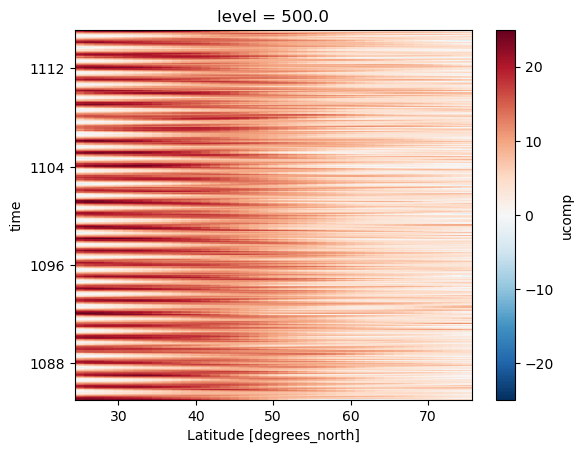

In [24]:
ubar_mon = access_mon_ds['ucomp'].mean('lon')
ubar_mon = ubar_mon.sel(level=500., method='nearest').sel(lat=slice(25, 75))
ubar_mon.plot()